In [3]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
from keras.models import load_model
img_width, img_height = 216, 384

In [4]:
class_names = ['almost_full', 'empty_bottle', 'full_bottle', 'none']

In [5]:
def make_prediction(src, model, show_image):
    for root, subdirs, files in os.walk(src):
        for images in files:
            img = Image.open(root + images)
            img = img.resize((img_width, img_height))
            if(show_image):
                img.show()
            #img = np.array(img).astype('float32')
            #img = img / 255.0
            X_to_predict = np.expand_dims(img, axis=0)
            y_pred = model.predict(X_to_predict)
            prediction_class = y_pred.argmax()
            
            print(prediction_class)
            print(class_names[prediction_class])
            print(y_pred)
            

print(class_names)

['almost_full', 'empty_bottle', 'full_bottle', 'none']


# Do odczytu

In [15]:
model2 = load_model('trening_ver2_zdjecia_2.h5')

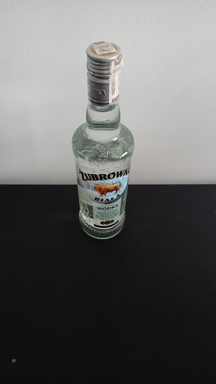

0
almost_full
[[7.6747733e-01 5.0599478e-02 1.8191907e-01 4.0714622e-06]]


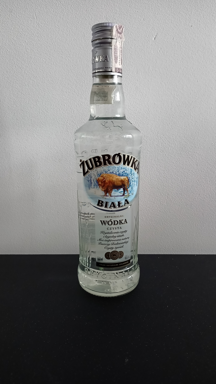

0
almost_full
[[5.6054276e-01 4.3776205e-01 1.6936216e-03 1.5562999e-06]]


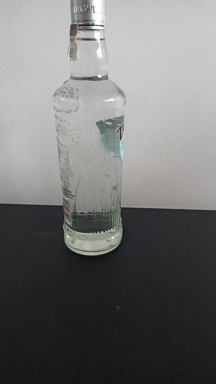

1
empty_bottle
[[3.6917931e-01 3.7633786e-01 2.5431663e-01 1.6619814e-04]]


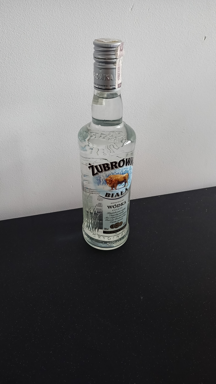

2
full_bottle
[[4.4935474e-01 9.8789753e-03 5.4076624e-01 2.2756902e-08]]


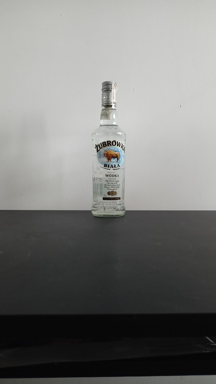

1
empty_bottle
[[2.8245913e-05 9.9947554e-01 2.4914260e-07 4.9602205e-04]]


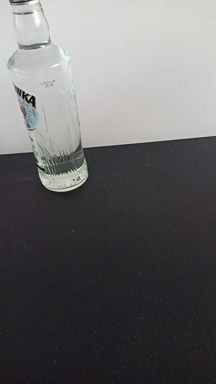

1
empty_bottle
[[1.3833299e-01 8.6134607e-01 1.9230877e-06 3.1903604e-04]]


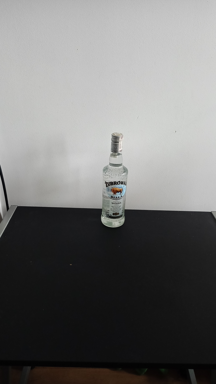

2
full_bottle
[[1.4379089e-02 2.5403801e-01 7.3149860e-01 8.4349027e-05]]


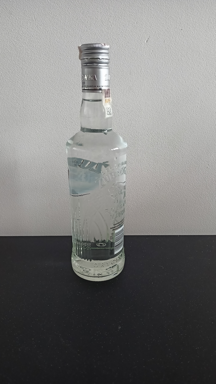

1
empty_bottle
[[1.0668337e-05 9.9998701e-01 8.1180318e-08 2.2114491e-06]]


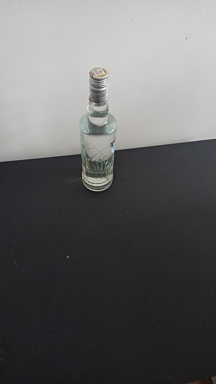

1
empty_bottle
[[3.6330026e-04 9.9963343e-01 1.7666808e-08 3.2599426e-06]]


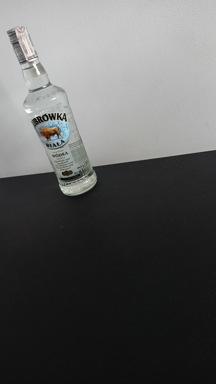

1
empty_bottle
[[1.3561669e-01 8.6136526e-01 1.8268869e-04 2.8354183e-03]]


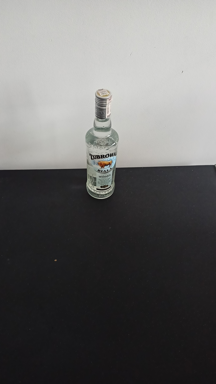

1
empty_bottle
[[7.7702140e-04 9.9921358e-01 2.5554854e-07 9.1595402e-06]]


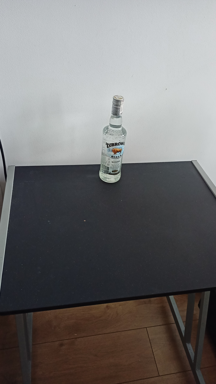

1
empty_bottle
[[1.8767772e-05 9.9997139e-01 3.4057187e-08 9.8464980e-06]]


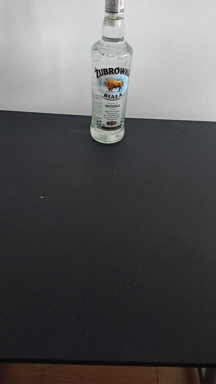

1
empty_bottle
[[3.9957970e-10 1.0000000e+00 1.0713670e-15 4.3396685e-08]]


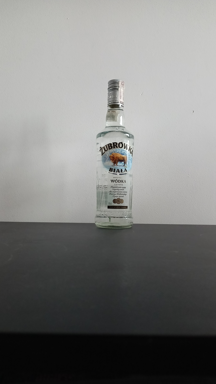

1
empty_bottle
[[1.2052788e-05 9.9943203e-01 8.0262583e-07 5.5506761e-04]]


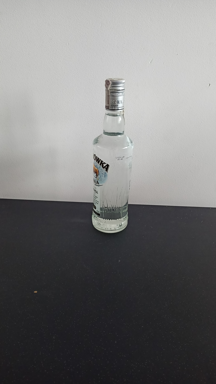

1
empty_bottle
[[7.5741862e-03 9.9064612e-01 1.7535698e-03 2.6040065e-05]]


In [12]:
make_prediction('dataset/testy_butelka/Pełny/', model2, True)

In [10]:
def check_prediction(src, directory_names, model):
    for index, directory_name in enumerate(directory_names):
        full_dir_name = "{src}{dir}".format(src=src, dir = directory_name)
        print("Sprawdzanie folderu '{dir_name}' jako '{class_name}'".format(dir_name = full_dir_name, class_name = class_names[index]))
        class_images = 0
        class_correct_images = 0
        for root, subdirs, files in os.walk(full_dir_name):
            for images in files:
                img = Image.open(root + images)
                img = img.resize((img_width, img_height))
                #img = np.array(img).astype('float32')
                #img = img / 255.0
                X_to_predict = np.expand_dims(img, axis=0)
                y_pred = model.predict(X_to_predict)
                prediction_class = y_pred.argmax()

                if(prediction_class == index):
                    class_correct_images = class_correct_images + 1
                class_images = class_images + 1
        
        print("{correct} na {total_images} było poprawny".format(correct = class_correct_images, total_images = class_images))
    


In [16]:
check_prediction('dataset/testy_butelka/', ['Prawie pełna/', "Puste/", "Pełny/", "Brak/"], model2)

Sprawdzanie folderu 'dataset/testy_butelka/Prawie pełna/' jako 'almost_full'
12 na 15 było poprawny
Sprawdzanie folderu 'dataset/testy_butelka/Puste/' jako 'empty_bottle'
9 na 16 było poprawny
Sprawdzanie folderu 'dataset/testy_butelka/Pełny/' jako 'full_bottle'
4 na 15 było poprawny
Sprawdzanie folderu 'dataset/testy_butelka/Brak/' jako 'none'
15 na 15 było poprawny
